# Ray Tracing with satGEM

## Introduction
This notebook contains ray tracing using satGEM T-S and velocity fields 

In [56]:
%matplotlib inline
import numpy as np
import scipy
import ray_tracing_satGEM_v2 as rt
import oceans as oc
import warnings
import matplotlib.pyplot as plt
import pandas as pd
from jupyterthemes import jtplot
warnings.simplefilter("ignore")
plt.rcParams.update({'font.size':14})

jtplot.reset()

### Set up
- Load in the results of the wave feature parametrizations and create a wave for each one. 


In [61]:
# Load Data
wave_props = pd.read_pickle('wave_properties.pkl')

# convert back to numpy array for easier indexing
wave_props = wave_props.as_matrix()

all_waves = []
# columns order = ['k', 'l', 'm', 'omega', 'depth', 'lon', 'lat', 'date']

# make wave objects for each good bin
for wave in wave_props:
    all_waves.append(rt.Wave(k=wave[0], l=wave[1], m=-wave[2], w0=wave[3], z0=wave[4], t0=wave[7],
                lat=wave[6], lon=wave[5],
                ))
    
gem = rt.satGEM_mini()
 
for wave in all_waves[17:18]:
    rt.ray_tracing_interp(wave, gem, duration=50*24,
                       tstep=45,
                       time_direction='reverse',
                       latpad=200, lonpad=200, tpad=6,
                       extend_bathy=50*1000,
                       interp_mode='lnd', interp_function='linear')
    

8665
96000


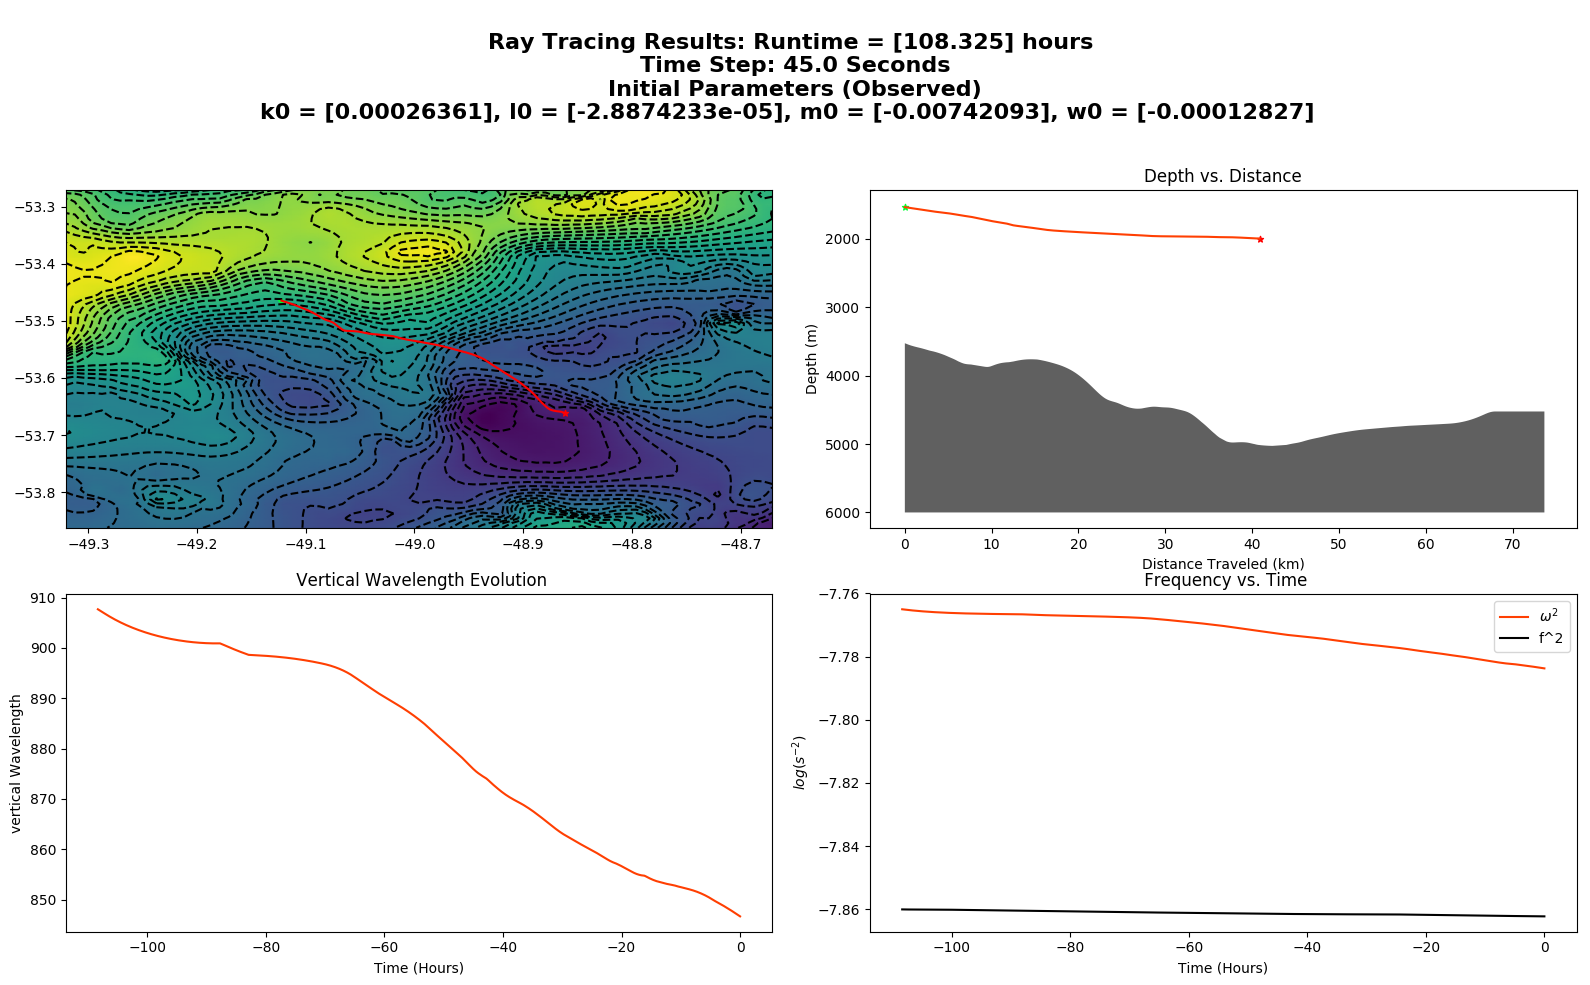

In [62]:
wave1 = all_waves[17]
results = wave1.results  
rt.plot_results(results, gem)


In [34]:
plt.figure()
plt.plot(results['dvdz'])


In [35]:
wave1 = all_waves[2]
results = wave1.results
#    
rt.plot_results(results, gem)

AttributeError: 'Wave' object has no attribute 'results'

In [ ]:
wave1 = all_waves[3]
results = wave1.results
#    
rt.plot_results(results, gem)

array([[-0.0062492 ],
       [-0.00624896],
       [-0.00624873],
       ...,
       [ 0.00781699],
       [ 0.00781709],
       [ 0.00781719]])